## Data Input 

In [1]:
pip install transformers datasets evaluate accelerate

Note: you may need to restart the kernel to use updated packages.


In [1]:
from datasets import load_dataset
dataset = load_dataset("jakeazcona/short-text-labeled-emotion-classification")

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sample', 'label'],
        num_rows: 24032
    })
    test: Dataset({
        features: ['sample', 'label'],
        num_rows: 6008
    })
    val_iron: Dataset({
        features: ['sample', 'label'],
        num_rows: 28
    })
    val_neg: Dataset({
        features: ['sample', 'label'],
        num_rows: 24
    })
})

In [4]:
dataset["train"][0]

{'sample': 'i tend to be a window shopper when im alone because theres always going to be a self imposed limit of one or two when im feeling naughty',
 'label': 3}

In [5]:
train_data = dataset["train"]

In [6]:
train_data

Dataset({
    features: ['sample', 'label'],
    num_rows: 24032
})

In [7]:
import pandas as pd

In [8]:
# Convert to Pandas DataFrame
train_df = pd.DataFrame(train_data)

In [9]:
train_df.head()

,sample,label
0,i tend to be a window shopper when im alone be...,3
1,i will hopefully be able to feel less inhibite...,5
2,i feel very fond of my pinky kids,3
3,i feel like i had so much to write then got di...,0
4,i knew i was going to look at the mess and fee...,5


In [10]:
train_df.describe()

,label
count,24032.000000
mean,2.603196
std,1.729178
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


## Data Preprocessing

In [11]:
# Assuming your original DataFrame is named train_df
# Create separate DataFrames for label 0 and label 1
label_0_df = train_df[train_df['label'] == 0].head(1500)
label_1_df = train_df[train_df['label'] == 1].head(1500)
label_2_df = train_df[train_df['label'] == 2].head(1500)
label_3_df = train_df[train_df['label'] == 3].head(1500)
label_4_df = train_df[train_df['label'] == 4].head(1500)
label_5_df = train_df[train_df['label'] == 5].head(6500)

# Concatenate the two DataFrames to create the new DataFrame
SonaliData = pd.concat([label_0_df, label_1_df,label_2_df, label_3_df,label_4_df, label_5_df])

# Shuffle the new DataFrame to randomize the order of rows
SonaliData = SonaliData.sample(frac=1).reset_index(drop=True)

In [12]:
SonaliData.head()

,sample,label
0,i feel a loss for the precious lives that were...,2
1,i feel paranoid thinking about it just looking...,1
2,i feel totally lame but i have no idea what to...,5
3,That’s not munchausen. She has a diagnosed ill...,1
4,i feel the melancholy running my veins as well,5


In [13]:
SonaliData.describe()

,label
count,13423.000000
mean,3.323773
std,1.826657
min,0.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


In [14]:
#Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

## Data Modeling

In [15]:
import string

In [2]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer, DistilBertForSequenceClassification, DistilBertTokenizer, RobertaForSequenceClassification, RobertaTokenizer, XLNetForSequenceClassification, XLNetTokenizer, AlbertForSequenceClassification, AlbertTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
SonaliData['sample'] = SonaliData['sample'].apply(preprocess_text)

In [19]:
SonaliData.head()

,sample,label
0,feel loss precious life taken mercilessly abom...,2
1,feel paranoid thinking looking window feeling ...,1
2,feel totally lame idea blog today,5
3,’ munchausen diagnosed illness ’ terrible terr...,1
4,feel melancholy running vein well,5


Now We have preprocessed our data, so Now we would pick any 5 models from hugging

In [20]:
train_df, test_df = train_test_split(SonaliData, test_size=0.2, random_state=42)

In [21]:
# Define the model names
model_names = ["bert-base-uncased", "distilbert-base-uncased", "roberta-base", "albert-base-v2", "xlnet-base-cased"]

In [22]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from tqdm import tqdm
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [23]:
from tqdm import tqdm  # Import tqdm for progress bar

In [24]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score

In [25]:
# Dictionary to store results
results_dict = {}

In [26]:
import warnings
warnings.filterwarnings("ignore")
for model_name in model_names:
    # Load tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # Tokenize and prepare data
    train_texts = train_df['sample'].tolist()
    train_labels = train_df['label'].tolist()

    # Use smaller batches for tokenization
    batch_size = 32
    num_batches = len(train_texts) // batch_size + (len(train_texts) % batch_size != 0)

    predictions = []

    # Use tqdm for a progress bar
    for i in tqdm(range(num_batches), desc=f"Training {model_name}"):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_texts = train_texts[start_idx:end_idx]
        batch_labels = train_labels[start_idx:end_idx]

        tokenized_data = tokenizer(batch_texts, padding=True, truncation=True, return_tensors="pt")

        with torch.no_grad():
            logits = model(**tokenized_data).logits

        batch_predictions = torch.argmax(logits, dim=1).tolist()
        predictions.extend(batch_predictions)

    # Evaluate the model on the test set
    test_texts = test_df['sample'].tolist()
    test_labels = test_df['label'].tolist()

    tokenized_test_data = tokenizer(test_texts, padding=True, truncation=True, return_tensors="pt")

    with torch.no_grad():
        logits = model(**tokenized_test_data).logits

    predictions = torch.argmax(logits, dim=1).tolist()

    # Store classification report and other metrics in the dictionary
    classification_rep = classification_report(test_labels, predictions, output_dict=True)
    accuracy = accuracy_score(test_labels, predictions)
    precision_weighted = precision_score(test_labels, predictions, average='weighted')
    recall_weighted = recall_score(test_labels, predictions, average='weighted')
    f1_weighted = f1_score(test_labels, predictions, average='weighted')
    kappa = cohen_kappa_score(test_labels, predictions)

    results_dict[model_name] = {
        "classification_report": classification_rep,
        "accuracy": accuracy,
        "precision_weighted": precision_weighted,
        "recall_weighted": recall_weighted,
        "f1_weighted": f1_weighted,
        "cohen_kappa": kappa,
    }

    # Print metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision_weighted:.4f}")
    print(f"Recall (Weighted): {recall_weighted:.4f}")
    print(f"F1 Score (Weighted): {f1_weighted:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print("=" * 50)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Model: bert-base-uncased
Accuracy: 0.1162
Precision (Weighted): 0.0277
Recall (Weighted): 0.1162
F1 Score (Weighted): 0.0415
Cohen's Kappa: -0.0006


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.

Model: distilbert-base-uncased
Accuracy: 0.1184
Precision (Weighted): 0.0287
Recall (Weighted): 0.1184
F1 Score (Weighted): 0.0391
Cohen's Kappa: 0.0042


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should pr

Model: roberta-base
Accuracy: 0.1143
Precision (Weighted): 0.0131
Recall (Weighted): 0.1143
F1 Score (Weighted): 0.0235
Cohen's Kappa: 0.0000


Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.dense.bias', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.bias', 'predictions.dense.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model 

Model: albert-base-v2
Accuracy: 0.1132
Precision (Weighted): 0.0188
Recall (Weighted): 0.1132
F1 Score (Weighted): 0.0247
Cohen's Kappa: -0.0013


Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.weight', 'sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Model: xlnet-base-cased
Accuracy: 0.1091
Precision (Weighted): 0.0240
Recall (Weighted): 0.1091
F1 Score (Weighted): 0.0358
Cohen's Kappa: -0.0065


In [27]:
results_dict

{'bert-base-uncased': {'classification_report': {'0': {'precision': 0.12571428571428572,
    'recall': 0.21498371335504887,
    'f1-score': 0.15865384615384615,
    'support': 307},
   '1': {'precision': 0.11388888888888889,
    'recall': 0.780952380952381,
    'f1-score': 0.1987878787878788,
    'support': 315},
   '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 305},
   '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 278},
   '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 285},
   '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1195},
   'accuracy': 0.11620111731843576,
   'macro avg': {'precision': 0.03993386243386243,
    'recall': 0.1659893490512383,
    'f1-score': 0.059573620823620825,
    'support': 2685},
   'weighted avg': {'precision': 0.027735301942005856,
    'recall': 0.11620111731843576,
    'f1-score': 0.04146179239754658,
    'support': 2685}},
  'accuracy': 0.11620111731843576,
  'precision_w

### Converting dictionary to csv file

In [29]:
import pandas as pd

# Convert results_dict to a DataFrame
results_df = pd.DataFrame(results_dict).T

# Remove the first column
results_df = results_df.iloc[:, 1:]

# Save DataFrame to a CSV file
results_df.to_csv('Final_results.csv')

# Access results_df to get the evaluation results for each model
print(results_df)

                         accuracy precision_weighted recall_weighted  \
bert-base-uncased        0.116201           0.027735        0.116201   
distilbert-base-uncased  0.118436           0.028657        0.118436   
roberta-base             0.114339           0.013073        0.114339   
albert-base-v2           0.113222           0.018783        0.113222   
xlnet-base-cased         0.109125           0.024017        0.109125   

                        f1_weighted cohen_kappa  
bert-base-uncased          0.041462   -0.000605  
distilbert-base-uncased    0.039109    0.004224  
roberta-base               0.023464         0.0  
albert-base-v2             0.024721   -0.001313  
xlnet-base-cased            0.03581   -0.006467  


### Now I have made the csv file that i will input in the package i made

In [ ]:
pip install Topsis-Sonali-102116117

In [ ]:
!topsis Final_results.csv "1,1,1,1,1" "+,+,+,+,+" answer.csv

### Now I have made answer.csv file in which topsis result is stored now I would use it for plotting

In [7]:
import pandas as pd

In [8]:
FinalAnswer = pd.read_csv('answer.csv')

In [9]:
FinalAnswer

,Unnamed: 0,accuracy,precision_weighted,recall_weighted,f1_weighted,cohen_kappa,Topsis Score,Rank
0,bert-base-uncased,0.116201,0.027735,0.116201,0.041462,-0.000605,0.424541,4.0
1,distilbert-base-uncased,0.118436,0.028657,0.118436,0.039109,0.004224,0.021643,5.0
2,roberta-base,0.114339,0.013073,0.114339,0.023464,0.000000,0.445177,3.0
3,albert-base-v2,0.113222,0.018783,0.113222,0.024721,-0.001313,0.534189,2.0
4,xlnet-base-cased,0.109125,0.024017,0.109125,0.035810,-0.006467,0.836544,1.0


In [ ]:
## Graphs Plotting using matplotlib between my model(x axis) and Topsis score(y axis)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

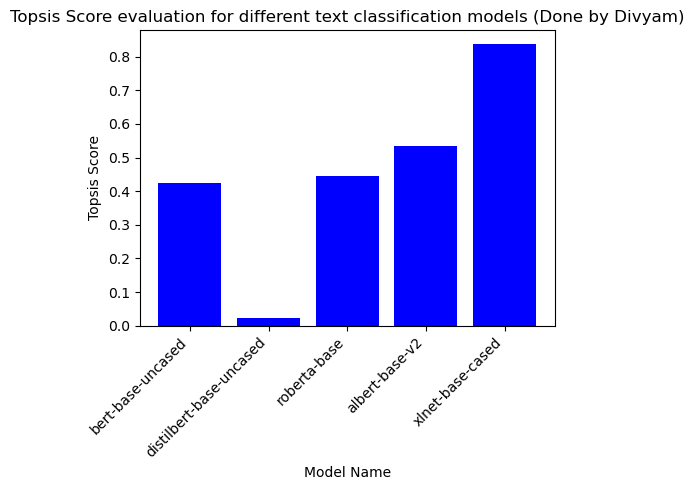

In [17]:
# Assuming your DataFrame is named 'FinalAnswer'
model_names = FinalAnswer['Unnamed: 0']
topsis_scores = FinalAnswer['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
## So I can conclude that xlnet-base-cased pretrained model works better on text classification for our dataset